<a href="https://colab.research.google.com/github/NithyaPKiran/Assignments/blob/main/Assignment_17_Support_Vector_Machines_1_Forest_Fires.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
from sklearn import preprocessing
from sklearn import metrics
import seaborn as sns
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt
from sklearn.decomposition import PCA
from mlxtend.plotting import plot_decision_regions

## __1 - Business Problem__  
___Classify the Size_Categorie using SVM___  

## __2 - Data collection and description__

In [ ]:
df = pd.read_csv("forestfires.csv")

In [ ]:
df1 = df.copy()

In [ ]:
df1.head()

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,...,0,0,0,0,1,0,0,0,0,small
1,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,...,0,0,0,0,0,0,0,1,0,small
2,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,...,0,0,0,0,0,0,0,1,0,small
3,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,...,0,0,0,0,1,0,0,0,0,small
4,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,...,0,0,0,0,1,0,0,0,0,small


In [ ]:
df1.dtypes

month             object
day               object
FFMC             float64
DMC              float64
DC               float64
ISI              float64
temp             float64
RH                 int64
wind             float64
rain             float64
area             float64
dayfri             int64
daymon             int64
daysat             int64
daysun             int64
daythu             int64
daytue             int64
daywed             int64
monthapr           int64
monthaug           int64
monthdec           int64
monthfeb           int64
monthjan           int64
monthjul           int64
monthjun           int64
monthmar           int64
monthmay           int64
monthnov           int64
monthoct           int64
monthsep           int64
size_category     object
dtype: object

In [ ]:
df1.shape

(517, 31)

In [ ]:
df1[df1.columns[0:11]].describe().T

,count,mean,std,min,25%,50%,75%,max
FFMC,517.0,90.644681,5.520111,18.7,90.2,91.60,92.90,96.20
DMC,517.0,110.872340,64.046482,1.1,68.6,108.30,142.40,291.30
DC,517.0,547.940039,248.066192,7.9,437.7,664.20,713.90,860.60
ISI,517.0,9.021663,4.559477,0.0,6.5,8.40,10.80,56.10
temp,517.0,18.889168,5.806625,2.2,15.5,19.30,22.80,33.30
RH,517.0,44.288201,16.317469,15.0,33.0,42.00,53.00,100.00
wind,517.0,4.017602,1.791653,0.4,2.7,4.00,4.90,9.40
rain,517.0,0.021663,0.295959,0.0,0.0,0.00,0.00,6.40
area,517.0,12.847292,63.655818,0.0,0.0,0.52,6.57,1090.84


In [ ]:
df1[df1.columns[0:11]].isnull().sum()

month    0
day      0
FFMC     0
DMC      0
DC       0
ISI      0
temp     0
RH       0
wind     0
rain     0
area     0
dtype: int64

In [ ]:
for col in df1.columns[0:11]:
    if df1[col].dtype == "object":
        print(col)

month
day


In [ ]:
df1['month'].replace({'mar':3, 'oct':10, 'aug':8, 'sep':9, 'apr':4, 'jun':6, 'jul':7, 'feb':2, 'jan':1, 'dec':12, 'may':5, 'nov':11}, inplace = True)


In [ ]:
df1['month'] = pd.to_numeric(df1['month'])

In [ ]:
df1['day'].unique()

array(['fri', 'tue', 'sat', 'sun', 'mon', 'wed', 'thu'], dtype=object)

In [ ]:
df1['day'].replace({'fri':6, 'tue':3, 'sat':7, 'sun':1, 'mon':2, 'wed':4, 'thu':5}, inplace = True)


In [ ]:
df1['day'] = pd.to_numeric(df1['day'])

### Finding Correlation

In [ ]:
corr = df1[df1.columns[0:11]].corr()

<Axes: >

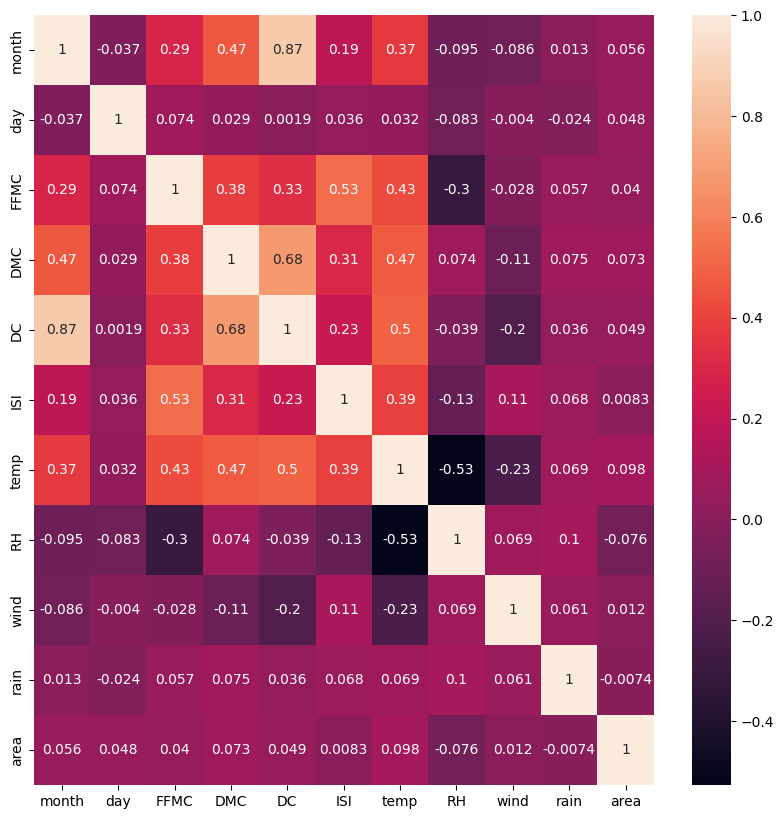

In [ ]:
plt.figure(figsize=(10,10))
sns.heatmap(corr,annot=True)

### Outlier Check

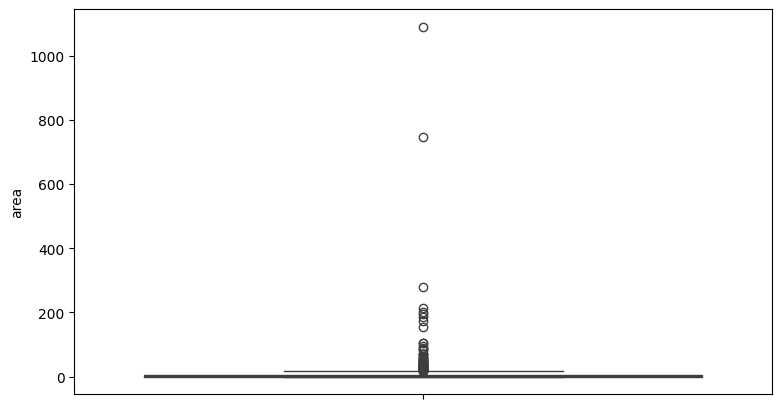

In [ ]:
ax = sns.boxplot(df1['area'])

### There are 3 Outlier instances in our data

In [ ]:
plt.rcParams["figure.figsize"] = 9,5

Skew: 12.846933533934868
Kurtosis: 194.1407210942299


<ipython-input-178-820044ef5e81>:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  ax = sns.kdeplot(df1['area'],shade=True,color='g')


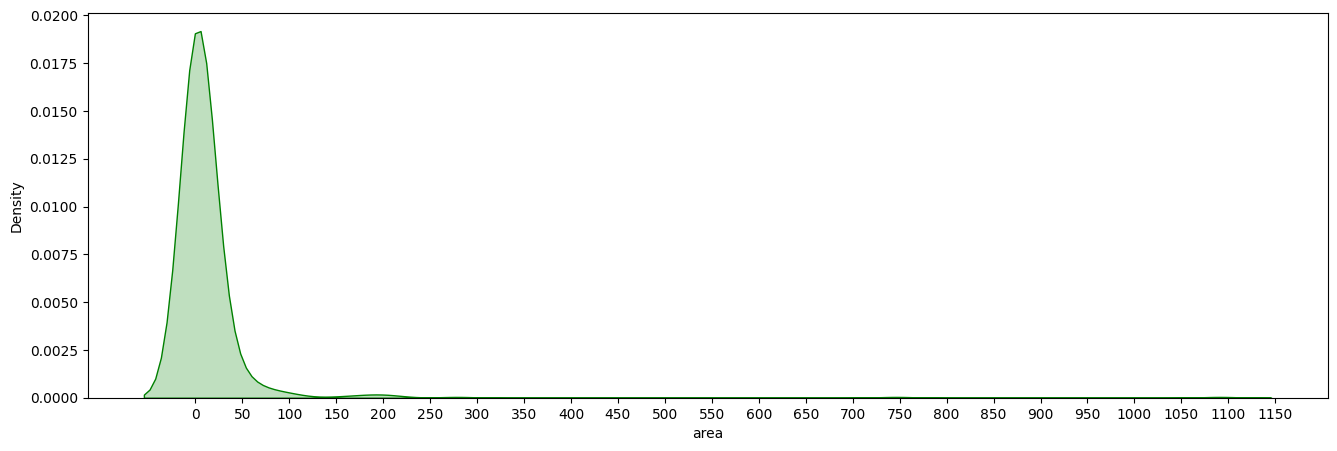

In [ ]:
plt.figure(figsize=(16,5))
print("Skew: {}".format(df1['area'].skew()))
print("Kurtosis: {}".format(df1['area'].kurtosis()))
ax = sns.kdeplot(df1['area'],shade=True,color='g')
plt.xticks([i for i in range(0,1200,50)])
plt.show()

### The Data is highly skewed and has large kurtosis value  
### Majority of the forest fires do not cover a large area, most of the damaged area is under 100 hectares of land

In [ ]:
dfa = df1[df1.columns[0:10]]
month_colum = dfa.select_dtypes(include='object').columns.tolist()

In [ ]:
plt.figure(figsize=(16,10))
for i,col in enumerate(month_colum,1):
    plt.subplot(2,2,i)
    sns.countplot(data=dfa,y=col)
    plt.subplot(2,2,i+2)
    df1[col].value_counts(normalize=True).plot.bar()
    plt.ylabel(col)
    plt.xlabel('% distribution per category')
plt.tight_layout()
plt.show()

<Figure size 1600x1000 with 0 Axes>

In [ ]:
num_columns = dfa.select_dtypes(exclude='object').columns.tolist()

## __3 - SVM__

In [ ]:
X = df1.iloc[:,2:30]
y = df1.iloc[:,30]

In [ ]:
mapping = {'small': 1, 'large': 2}

In [ ]:
y = y.replace(mapping)

In [ ]:
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size = 0.20, stratify = y)

### 3.1 Linear

In [ ]:
model_linear = SVC(kernel = "linear")
model_linear.fit(x_train,y_train)
pred_test_linear = model_linear.predict(x_test)
print("Accuracy:",metrics.accuracy_score(y_test, pred_test_linear))

Accuracy: 1.0


### 3.2 Poly

In [ ]:
model_poly = SVC(kernel = "poly")
model_poly.fit(x_train,y_train)
pred_test_poly = model_poly.predict(x_test)
print("Accuracy:",metrics.accuracy_score(y_test, pred_test_poly))

Accuracy: 0.7596153846153846


### 3.3 RBF

In [ ]:
model_rbf = SVC(kernel = "rbf")
model_rbf.fit(x_train,y_train)
pred_test_rbf = model_rbf.predict(x_test)
print("Accuracy:",metrics.accuracy_score(y_test, pred_test_rbf))

Accuracy: 0.7403846153846154


### 3.4 Sigmoid

In [ ]:
model_sigmoid = SVC(kernel = "sigmoid")
model_sigmoid.fit(x_train,y_train)
pred_test_sigmoid = model_sigmoid.predict(x_test)
print("Accuracy:",metrics.accuracy_score(y_test, pred_test_sigmoid))

Accuracy: 0.75


## __4 - Conclusion__

In [ ]:
ytt = y_train.to_numpy()

In [ ]:
pca = PCA(n_components = 2)

In [ ]:
x_train2 = pca.fit_transform(x_train)

In [ ]:
model_linear.fit(x_train2,ytt)

SVC(kernel='linear')

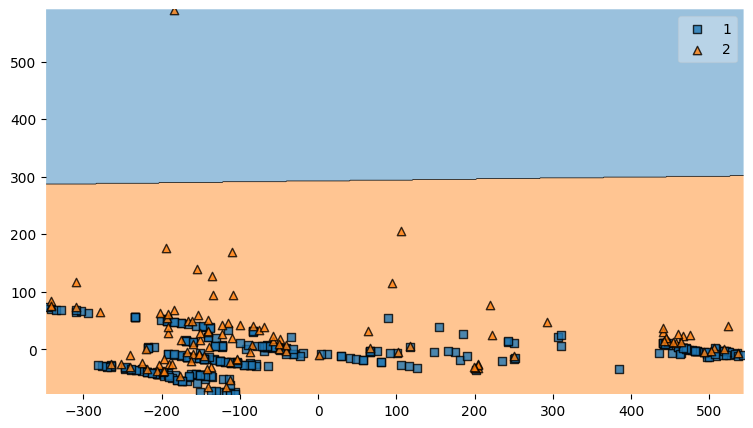

In [ ]:
plot_decision_regions(x_train2,ytt, clf=model_linear)
plt.show()